In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [30]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

In [31]:
# Load the data
advert = pd.read_csv('Advertising.csv')
advert.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


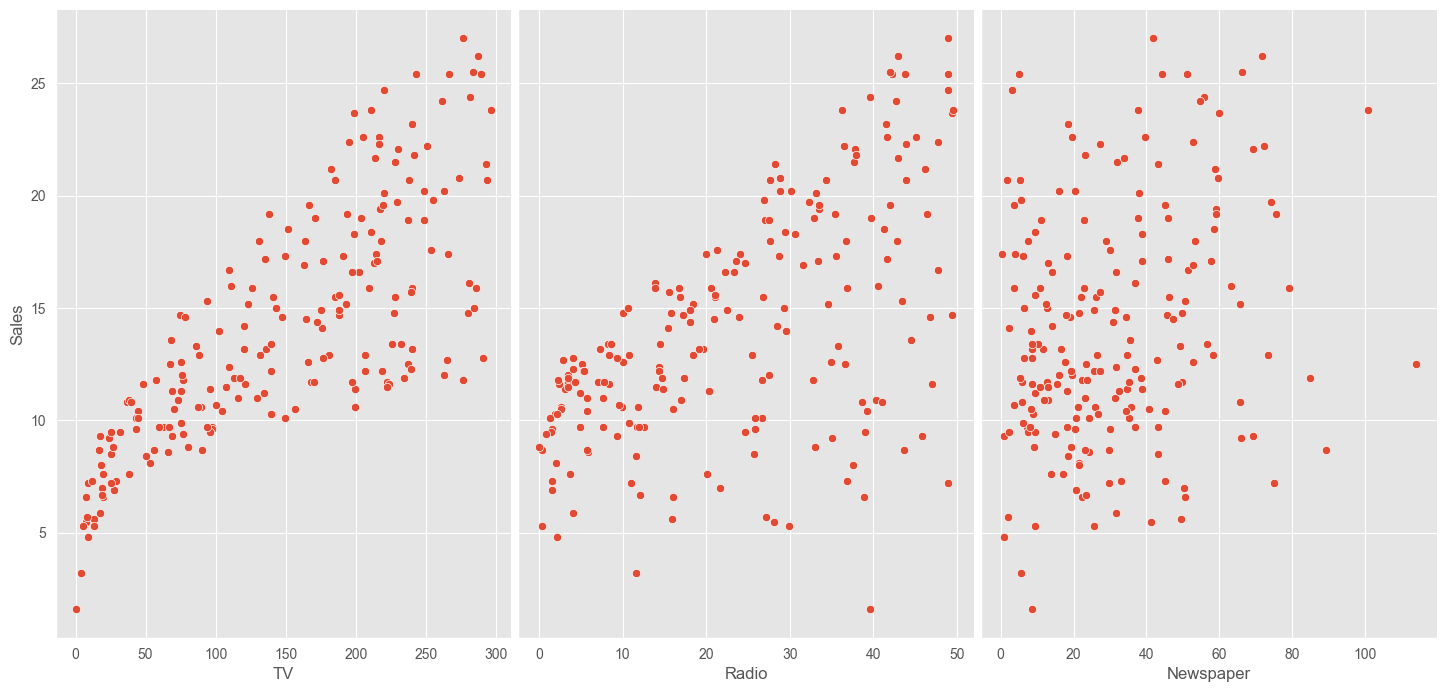

In [32]:
# Relationship between Features and Response
sns.pairplot(advert, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7);

In [33]:
from sklearn.linear_model import LinearRegression
X = advert[['TV', 'Radio', 'Newspaper']]
y = advert['Sales']

lm1 = LinearRegression()
lm1.fit(X, y)

print(lm1.intercept_)
print(lm1.coef_)

2.9388893694594103
[ 0.04576465  0.18853002 -0.00103749]


In [34]:
list(zip(['TV', 'Radio', 'NewsPaper'], lm1.coef_))

[('TV', 0.0457646454553976),
 ('Radio', 0.18853001691820442),
 ('NewsPaper', -0.0010374930424763007)]

sns.heatmap(advert.corr(), annot=True);

In [38]:
# Feature Selection
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['TV', 'Radio']], y)
lm2_preds = lm2.predict(X[['TV', 'Radio']])

print("Rˆ2", r2_score(y, lm2_preds))

Rˆ2 0.8971942610828957


In [39]:
lm3 = LinearRegression().fit(X[['TV', 'Radio', 'Newspaper']], y)
lm3_preds = lm3.predict(X[['TV', 'Radio', 'Newspaper']])

print("Rˆ2", r2_score(y, lm3_preds))

Rˆ2 0.8972106381789522


Adding newspaper to the model does not improve the results.

In [40]:
# Use train/test split with RMSE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = advert[['TV', 'Radio', 'Newspaper']]
y = advert['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lm4 = LinearRegression().fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE:  1.4046514230328953
R^2:  0.9156213613792232


In [42]:
X = advert[['TV', 'Radio']]
y = advert['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lm5 = LinearRegression().fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

RMSE:  1.3879034699382888
R^2:  0.9176214942248908


It is better to exclude newspaper from the model.

/Users/gilbertodemelojunior/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


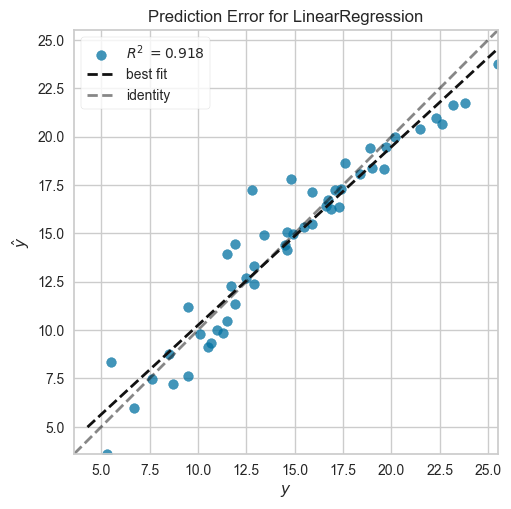

In [43]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(lm5).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();